<a href="https://colab.research.google.com/github/Riddhi-14/Assessments/blob/main/Assessment%20coding%20test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def local_binary_pattern(image):
    height, width = image.shape
    lbp_image = np.zeros((height - 2, width - 2), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            center = image[i, j]
            pixels = [image[i-1, j-1], image[i-1, j], image[i-1, j+1],
                      image[i, j+1], image[i+1, j+1], image[i+1, j],
                      image[i+1, j-1], image[i, j-1]]

            binary_values = (np.array(pixels) >= center).astype(int)
            decimal_value = np.sum(binary_values * 2**np.arange(8))
            lbp_image[i-1, j-1] = decimal_value

    return lbp_image

In [30]:
# Load the input image
image_path = r'new.jpg'
img_rgb = cv2.imread(image_path)

print("File path:", image_path)
print("Image loaded:", img_rgb is not None)

if img_rgb is not None:
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    # Continue with the rest of your code
else:
    print("Error: Unable to load the image.")


File path: new.jpg
Image loaded: True


In [31]:
# Apply LBP
lbp_result = local_binary_pattern(img_gray)

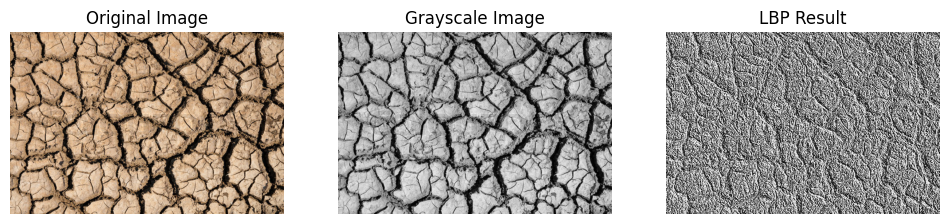

In [32]:
# Display the original and LBP images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lbp_result, cmap='gray')
plt.title('LBP Result')
plt.axis('off')

plt.show()